In [ ]:
import nltk
nltk.download('punkt')
import re
from collections import defaultdict
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import json
import os
import requests

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def getFriends(url, i, j, savedir='/Transcripts/'):    
  
  html   = requests.get(url).text                         # Get the raw HTML  
  soup   = BeautifulSoup(html,features="html.parser")     # Format the raw html
  data  = soup.findAll("p")                               # Find all <p> in the html which contains the conversation texts
  
  
  if (data is not None):                                  # conditional statement if data received or not
    if soup.h1 is not None:                               # some transcripts are not having title in h1 tag so condition to check that
      title = soup.h1.text
    else:
      title = " "
    print('Saving Series ' + str(i) + ' Episode ' + str(j) + ' ' + title)
    
    filename = savedir + 'series.txt'                     # saving file into series.txt file

    if os.path.exists(filename):                          # if file already exists append mode else write mode
      append_write = 'a' 
    else:
      append_write = 'w+' 

    f = open(filename,append_write)
    for i in range(2,len(data)):
      x = data[i].text                                    # for each p tag extracting text data and wriring to the file 
      x = x.replace('\n', ' ')                            # some sentences have new line character which should be avoided
      f.write(x)
      f.write('\n')
    f.close()


In [ ]:
for i in range(1,11):                                                                           # loop around series number 1 - 10
  for j in range(1,25):                                                                         # loop around episode number 1 - 25
    if(i <10 ):
      
      if (j<10):                                                                                # site link is different for episode <10 and >10
        url = 'https://fangj.github.io/friends/season/0' + str(i) + '0' + str(j) + '.html'
      else: 
        url = 'https://fangj.github.io/friends/season/0' + str(i) + str(j) + '.html'
        if (i==2) and (j==12 or j==13):
          url = 'https://fangj.github.io/friends/season/0212-0213.html'
        if (i==6) and (j==15 or j==16):
          url = 'https://fangj.github.io/friends/season/0615-0616.html'
        if (i==9) and (j==23 or j==24):
          url = 'https://fangj.github.io/friends/season/0923-0924.html'
        
      getFriends(url,i,j)                                                                       # calling method to extract data

    if (i==10 and j < 19):                                                                      # site link for series >9 is different and series 10 has only 16 episodes
      if (j<10):
        url = 'https://fangj.github.io/friends/season/10' + '0' + str(j) + '.html'
      elif (j>=10 and j<=18):
        url = 'https://fangj.github.io/friends/season/10' + str(j) + '.html'
        if (i==10) and (j==17 or j==18):
          url = 'https://fangj.github.io/friends/season/1017-1018.html'
        
      
      getFriends(url,i,j)                                                                        

      # some series have episodes only till 20 or 23 hence we get 404 if it tries to get 24 th episode of that series (S4E24, S5E24, S7E24, S8E24)
      # some urls are different from others, such urls are extracted separately and then added

Saving Series 1 Episode 1 The One Where Monica Gets a New Roommate (The Pilot-The Uncut Version)
Saving Series 1 Episode 2 The One With the Sonogram at the End
Saving Series 1 Episode 3 The One With the Thumb
Saving Series 1 Episode 4 The One With George Stephanopoulos
Saving Series 1 Episode 5 The One With the East German Laundry Detergent
Saving Series 1 Episode 6 The One With the Butt
Saving Series 1 Episode 7 The One With the Blackout
Saving Series 1 Episode 8 The One Where Nana Dies Twice
Saving Series 1 Episode 9 The One Where Underdog Gets Away
Saving Series 1 Episode 10 The One With the Monkey
Saving Series 1 Episode 11 The One With Mrs. Bing
Saving Series 1 Episode 12 The One With the Dozen Lasagnas
Saving Series 1 Episode 13 The One With the Boobies
Saving Series 1 Episode 14 The One With the Candy Hearts
Saving Series 1 Episode 15 The One With the Stoned Guy
Saving Series 1 Episode 16 The One With Two Parts, part 1
Saving Series 1 Episode 17 The One With Two Parts, Part 2
Sa

#### Sample Conversations 

In [ ]:
file = open("/Transcripts/series.txt", "r")
text = file.read()
print("Sample Conversations from Friends TV show")
print("--------------------------------------------")
print(text[0:1000])

Sample Conversations from Friends TV show
--------------------------------------------
Monica: There's nothing to tell! He's just some guy I work with!
Joey: C'mon, you're going out with the guy! There's gotta be something wrong with him!
Chandler: All right Joey, be nice.  So does he have a hump? A hump and a hairpiece?
Phoebe: Wait, does he eat chalk?
(They all stare, bemused.)
Phoebe: Just, 'cause, I don't want her to go through what I went through with Carl- oh!
Monica: Okay, everybody relax. This is not even a date. It's just two people going out to dinner and- not having sex.
Chandler: Sounds like a date to me.
[Time Lapse]
Chandler: Alright, so I'm back in high school, I'm standing in the middle of the cafeteria, and I realize I am totally naked.
All: Oh, yeah. Had that dream.
Chandler: Then I look down, and I realize there's a phone... there.
Joey: Instead of...?
Chandler: That's right.
Joey: Never had that dream.
Phoebe: No.
Chandler: All of a sudden, the phone starts to ring.

In [ ]:
def Explore_Friends(text, savedir='/Transcripts/scenes/'):
  character = re.findall('[A-Z|a-z]+:', text)                                # Characters in the conversations are represented by "character:"
  character = list(set(character))                                           # getting unique characters
  character = [a for a in character if not re.search('Scene:|All:', a)]      # removing Scene and All from character lists as they were not the original characters
  characters=[]
  for e in character:
    e = e.replace(":","")                                                    # replacing ":" from the character name
    characters.append(e)
  print('characters')
  print(characters)
  print('------------------------------------------')

  text = text.replace('Commercial Break','')                                 # removing unnecessary text
  text = text.replace('Closing Credits','')
  text = text.replace('End','')

  sentences = re.split(r'\n', text)                                          # tokenizing sentences

  print('Length of list of sentences')
  print(len(sentences))
  print(sentences[0:10])
  print('------------------------------------------')

  i = 0
  scene = defaultdict(list)                                                 # creating list for number of scenes
  for sent in sentences:
    if 'Scene' not in sent:                                                 # scene word indicates there is a change of scene
      scene[i].append(sent)
    else:
      i = i+1
  print(scene[1366])
  print('Number of scenes')
  print(len(scene))
  print('------------------------------------------')

  for i in range(len(scene)):                                             # loop to remove unnecesary data - like data between "[]", "()"
    for e in range(len(scene[i])):
      scene[i][e] = re.sub('\(.*?\)', '', scene[i][e])
      scene[i][e] = re.sub('(\[.*?\])', '', scene[i][e])
    

  for i in range(len(scene)):
    e = 0
    while e < len(scene[i]):                                                # removing empty sentences
      if scene[i][e] == "":
        scene[i].remove(scene[i][e])
      e+=1
    
  for i in range(len(scene)):
    filename = savedir + 'scene_' + str(i)
    if os.path.exists(filename):                          # if file already exists append mode else write mode
      append_write = 'a' 
    else:
      append_write = 'w+' 

    f = open(filename,append_write)
    e = 0
    while e < len(scene[i]):                                                # removing empty sentences
      f.write(scene[i][e])
      f.write('\n')
      e+=1
    f.close()
    
 
Explore_Friends(text)

chatacters
['Lambert', 'Cowgirl', 'Jill', 'Rosen', 'Janice', 'Mom', 'Train', 'Back', 'rejected', 'too', 'Walker', 'Shelley', 'Larry', 'Locksmith', 'Birth', 'down', 'Tasks', 'Catherine', 'King', 'Leedbetter', 'Marge', 'Issac', 'Lapse', 'Kid', 'Hint', 'happy', 'Chandler', 'Raymond', 'Jake', 'Guys', 'Li', 'Kristin', 'Sherman', 'Woman', 'Annabelle', 'Luisa', 'Glenda', 'Clark', 'MNCA', 'Alexander', 'effective', 'Leno', 'animals', 'Connelly', 'Joanne', 'Minister', 'exclaiming', 'Tommy', 'Cashier', 'Barry', 'Secretary', 'Rachel', 'Customers', 'Roommate', 'Russell', 'laughs', 'thought', 'stop', 'Adrienne', 'Robert', 'are', 'air', 'RICHARD', 'commercial', 'FBOB', 'Geller', 'Cleaner', 'appears', 'CHAN', 'Lauren', 'note', 'thing', 'Devon', 'Susan', 'Posner', 'scene', 'comments', 'Cailin', 'it', 'Rhodes', 'Party', 'announcer', 'was', 'Scientist', 'Iris', 'three', 'Cape', 'Lecturer', 'Radio', 'one', 'Michelle', 'Hillary', 'phone', 'PLANNER', 'Ashley', 'Announcer', 'CHANDLER', 'Phil', 'Bastard', 'fo

#### **Zipf's Law**
This law states that in any language, there are small sets of words that are used more often and there are large set of words that are used very rare. This can be shown in the below cell which plots number of words vs Number of occurences of each word.

Total number of words in Friends TV show
977931
------------------------------------------
Frequently occuring words ignoring common words
{'no': 3181, 'his': 3111, 'Scene': 3098, 'gonna': 3020, 'there': 3001, 'get': 2919, 'all': 2889, 'It': 2740, 'go': 2615, 'The': 2493}
--------------------------------------------------


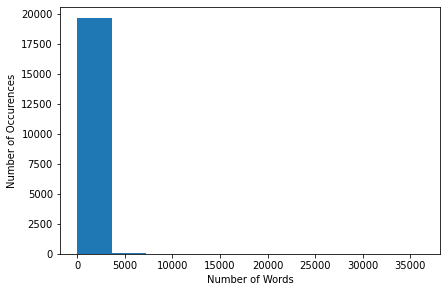

In [ ]:
words = re.findall('[A-Z|a-z]+', text)                                          # Getting vocab from text

print("Total number of words in Friends TV show")
print(len(words))
print("------------------------------------------")

dictionary = defaultdict(int)
for word in words:                                                              # count frequency of words
    dictionary[word] +=1

fig = plt.figure(figsize=(15,10))                                               # plotting words and their frequencies
fig.add_subplot(2,2,1)
sort = dict(sorted(dictionary.items(), key=lambda w:w[1], reverse=True))
x = sort.values()
plt.style.use('ggplot')
plt.hist(x,bins=10)
plt.xlabel("Number of Words")
plt.ylabel("Number of Occurences")
plt.show

freq = dict(sorted(dictionary.items(), key=lambda w:w[1], reverse=True)[60:70])
print("Frequently occuring words ignoring common words")
print(freq)
print("--------------------------------------------------")

# most of the words ranging 0 - 6000

In [ ]:
def getJoeyData(Joeyconvo, file):
    character = "Joey"
    responseDictionary = dict()
    with open("/Transcripts/scenes/" + file, "r") as fbFile:
        allLines = fbFile.readlines()
    characterMessage = ""
    reply = "" 
    Speaker = ""
    for index,lines in enumerate(allLines):
        Message = lines[0:]
        colon = Message.find(':')
        if (Message[:colon] == character):                                            # getting conversation of joey if he started first
            if not characterMessage:                                                  # loop - if he talked multiple times
                startMessageIndex = index - 1
            characterMessage += Message[colon + 2:]

        elif characterMessage:                                                        # getting replies to what joey talked
            for counter in range(startMessageIndex, 0, -1):
                currentLine = allLines[counter]
                Message = currentLine[0:]
                colon = Message.find(':')
                if not Speaker:
                    Speaker = Message[:colon]
                elif (Speaker != Message[:colon] and reply):
                    reply = reply
                    characterMessage = characterMessage
                    Joeyconvo[reply] = characterMessage
                    break
                reply = Message[colon + 2:] + reply
            characterMessage = ""
            reply = "" 
            Speaker = ""
  
    return Joeyconvo





# for every scene taking joey's conversation pairs
files = os.listdir("/Transcripts/scenes/")
count = 0
Joeyconvo = dict()
for file in files:
  count +=1
  dictionary = getJoeyData(Joeyconvo, file)
  Joeyconvo.update(dictionary)

# writing conversation pairs to file

with open('/Transcripts/joeyConversations.json', 'w') as fp:
    json.dump(Joeyconvo, fp)

In [ ]:
# get conversations pairs for whole data

def getConversationPairs(conversations, file):
    
    
    with open("/Transcripts/scenes/" + file, "r") as fbFile:
        allLines = fbFile.readlines()
    character_1 = ""
    character_2 = "" 
    Speaker = ""
    index = 0
    #print(allLines)
    while index < len(allLines)-1:
        #print(index)
        Message = allLines[index][0:]
        colon = Message.find(':')
        name = Message[:colon]
        character_1 += Message[colon + 2:]
        nextLine = allLines[index+1]
        colon1 = nextLine.find(':')
        name1 = nextLine[:colon1]
        i = index
        cnt = 0
        if name == name1:
          while i < len(allLines)-1 and name == name1:
            character_1 = character_1.rstrip()
            character_1 += ' '
            character_1 += nextLine[colon1 + 2:]
            i += 1
            nextLine = allLines[i]
            colon1 = nextLine.find(':')
            name1 = nextLine[:colon1]

        else:

          character_2 += nextLine[colon1 + 2:]
          
          i+=1
          if i < len(allLines)-1:
            next_Line = allLines[i+1]
            colon2 = next_Line.find(':')
            name2 = next_Line[:colon2]
            if name1 == name2:
              
              while i < len(allLines)-1 and name1 == name2:
                cnt += 1
                #print(name1, name2)
                character_2 = character_2.rstrip()
                character_2 += ' '
                character_2 += next_Line[colon2 + 2:]
                #print(character_2)
                i += 1
                if i < len(allLines)-1:
                  next_Line = allLines[i+1]
                  colon2 = next_Line.find(':')
                  name2 = next_Line[:colon2]
            else:
              conversations[character_1] = character_2
        index = i - cnt 
        character_1 = ""
        character_2 = "" 
        Speaker = ""
    
    if len(allLines) > 2:
      character_1 = allLines[-2]
      character_2 = allLines[-1] 
    conversations[character_1] = character_2
    return conversations




# getting conversation pairs for each scene
files = os.listdir("/Transcripts/scenes/")
count = 0
conversations = dict()
for file in files:
  count +=1
  dictionary = getConversationPairs(conversations, file)
  conversations.update(dictionary)

# storing in file
with open('/Transcripts/TVConversations.json', 'w') as fp:
    json.dump(conversations, fp)